In [1]:
import plotly
plotly.offline.init_notebook_mode()
import pandas as pd
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from pandas.plotting import boxplot
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV



In [2]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/95_cleaned_Raw_Data.csv'

In [3]:
ml_data = pd.read_csv(raw_data_url)

In [4]:
ml_data.head(n=5)

age         workclass  fnlwght  education  education_num_yr  \
0   39         State-gov    77516  Bachelors                13   
1   50  Self-emp-not-inc    83311  Bachelors                13   
2   38           Private   215646    HS-grad                 9   
3   53           Private   234721       11th                 7   
4   28           Private   338409  Bachelors                13   

       marital_status         occupation   relationship   race     sex  ...  \
0       Never-married       Adm-clerical  Not-in-family  White    Male  ...   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male  ...   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male  ...   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male  ...   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female  ...   

   annual_income  origin_descent  origin_descent_us income_outcome  \
0          <=50K   United States                  1              0   
1          <=50K   United States                  1              0   
2          <=50K   United States                  1              0   
3          <=50K   United States                  1              0   
4          <=50K           Carib                  0              0   

  level_of_employ age_range  education_level  marital_stat age_range_ord  \
0              FT     adult            CGRAD     Unmarried             2   
1              PT     adult            CGRAD       Married             2   
2              FT     adult           HSGRAD     Unmarried             2   
3              FT     adult               HS       Married             2   
4              FT     adult            CGRAD       Married             2   

  education_level_ord  
0                   6  
1                   6  
2                   3  
3                   2  
4                   6  

[5 rows x 24 columns]

In [5]:
ml_data.dtypes

age                     int64
workclass              object
fnlwght                 int64
education              object
education_num_yr        int64
marital_status         object
occupation             object
relationship           object
race                   object
sex                    object
cap_gain                int64
cap_loss                int64
hours_per_week          int64
native_country         object
annual_income          object
origin_descent         object
origin_descent_us       int64
income_outcome          int64
level_of_employ        object
age_range              object
education_level        object
marital_stat           object
age_range_ord           int64
education_level_ord     int64
dtype: object

In [6]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30072 entries, 0 to 30071
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  30072 non-null  int64 
 1   workclass            30072 non-null  object
 2   fnlwght              30072 non-null  int64 
 3   education            30072 non-null  object
 4   education_num_yr     30072 non-null  int64 
 5   marital_status       30072 non-null  object
 6   occupation           30072 non-null  object
 7   relationship         30072 non-null  object
 8   race                 30072 non-null  object
 9   sex                  30072 non-null  object
 10  cap_gain             30072 non-null  int64 
 11  cap_loss             30072 non-null  int64 
 12  hours_per_week       30072 non-null  int64 
 13  native_country       30072 non-null  object
 14  annual_income        30072 non-null  object
 15  origin_descent       29611 non-null  object
 16  orig

In [10]:
ml_data_copy = ml_data.copy()

In [11]:
ml_data_copy.shape

(30072, 24)

In [9]:
features_of_interest = ['workclass', 'education', 'marital_status','occupation', 'relationship', 'sex','race','origin_descent_us', 'level_of_employ', 'education_level', 'age_range', 'marital_stat']

In [12]:
tmp_cont = []
for feat in features_of_interest: 
    tmp_df = pd.get_dummies(ml_data_copy[feat],prefix=str(feat),sparse=True,drop_first=True)
    tmp_cont.append(tmp_df)
    feat_df = pd.concat(tmp_cont,axis=1)

ml_df = pd.concat([ml_data_copy,feat_df], axis=1)

ml_df.dtypes.unique()

array([dtype('int64'), dtype('O'), Sparse[uint8, 0]], dtype=object)

In [13]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30072 entries, 0 to 30071
Data columns (total 85 columns):
 #   Column                                Non-Null Count  Dtype           
---  ------                                --------------  -----           
 0   age                                   30072 non-null  int64           
 1   workclass                             30072 non-null  object          
 2   fnlwght                               30072 non-null  int64           
 3   education                             30072 non-null  object          
 4   education_num_yr                      30072 non-null  int64           
 5   marital_status                        30072 non-null  object          
 6   occupation                            30072 non-null  object          
 7   relationship                          30072 non-null  object          
 8   race                                  30072 non-null  object          
 9   sex                                   30072 non-nu

In [16]:
ml_df = ml_df.select_dtypes(include=['int64','Sparse[uint8, 0]'])

In [17]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30072 entries, 0 to 30071
Data columns (total 71 columns):
 #   Column                                Non-Null Count  Dtype           
---  ------                                --------------  -----           
 0   age                                   30072 non-null  int64           
 1   fnlwght                               30072 non-null  int64           
 2   education_num_yr                      30072 non-null  int64           
 3   cap_gain                              30072 non-null  int64           
 4   cap_loss                              30072 non-null  int64           
 5   hours_per_week                        30072 non-null  int64           
 6   origin_descent_us                     30072 non-null  int64           
 7   income_outcome                        30072 non-null  int64           
 8   age_range_ord                         30072 non-null  int64           
 9   education_level_ord                   30072 non-nu

In [18]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html



ML_std_clf = StandardScaler()
#removed some redundant dummy variables
if 'income_outcome' in ml_df:
    y = ml_df['income_outcome'].values 
    del ml_df['income_outcome'] 
    X = ml_df.values 
    






In [19]:
num_cv_iterations = 3
num_instances = len(y)
#cv_object = ShuffleSplit(n_splits=num_cv_iterations,
#                         test_size  = 0.2)

cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 959)
                         
print(cv_object)

StratifiedShuffleSplit(n_splits=3, random_state=959, test_size=0.2,
            train_size=None)


In [20]:
ml_df.shape

(30072, 70)

====Iteration 0  ====

Accuracy:  0.8443890274314214 

f1_score: 0.6640344580043072 

precision_score: 0.718167701863354 

roc_auc_score: 0.7685634569064561 

Confusion Matrix: 

      0    1
0  4154  363
1   573  925 

Train Time:  1.197484952 s

====Iteration 1  ====

Accuracy:  0.8468827930174564 

f1_score: 0.6644808743169399 

precision_score: 0.731355252606255 

roc_auc_score: 0.7673237403394918 

Confusion Matrix: 

      0    1
0  4182  335
1   586  912 

Train Time:  0.9597113420000003 s

====Iteration 2  ====

Accuracy:  0.8470490440565254 

f1_score: 0.6582466567607728 

precision_score: 0.7420435510887772 

roc_auc_score: 0.761634212009637 

Confusion Matrix: 

      0    1
0  4209  308
1   612  886 

Train Time:  1.054493323 s



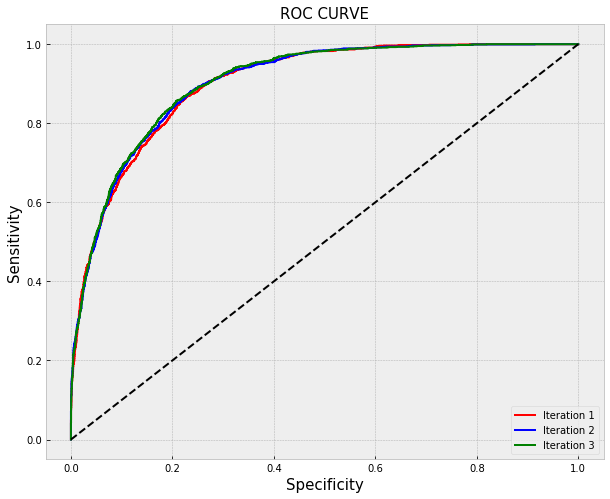

In [21]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
##https://docs.python.org/3/library/time.html#functions

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)


#lr_clf = LogisticRegression(penalty='elasticnet', C=1.0, class_weight=None, solver='saga', l1_ratio = 0.5 )
lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight=None, solver='liblinear')
lr_clf_pipe = make_pipeline(StandardScaler(),lr_clf)


iter_num=0
weights = []

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    t = time.process_time()
    
    lr_clf_pipe.fit(X_train,y_train)
    y_hat = lr_clf_pipe.predict(X_test) # get test set precitions
    
    elapsed_time = time.process_time() - t
    

    # now let's get the accuracy and confusion matrix for these iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])

    
    
    prob = lr_clf_pipe.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
weights = np.array(weights)

In [22]:
weights

array([[ 4.78932954e-01,  7.80494716e-02,  2.22302141e-01,
         2.38916675e+00,  2.65906423e-01,  2.16555001e-01,
         3.34273709e-02, -7.21569569e-02,  1.76102307e-01,
        -1.80716653e-01, -2.08112454e-01, -4.87460356e-02,
        -2.28909317e-01, -1.70522910e-01, -1.29495478e-01,
        -1.58218669e-02,  1.78360064e-02, -8.18375038e-03,
        -1.32613051e-02, -4.01041582e-02, -1.07340735e-02,
        -1.21395640e-02,  6.94185726e-04,  6.71740862e-02,
         8.62011164e-02, -2.44697048e-02,  4.73095974e-02,
        -1.70329519e-01,  1.52263013e-01,  1.43991095e-02,
         4.45815302e-02,  5.92263399e-01, -1.09794209e-01,
        -1.89280927e-01, -1.64170349e-01,  5.54851690e-02,
        -1.55859379e-02,  1.64215610e-02,  2.85108269e-01,
        -1.57399362e-01, -1.38223923e-01, -9.43737463e-02,
        -2.35943049e-01, -3.06939489e-01,  1.92110537e-01,
         9.24846962e-02,  1.16452053e-01,  1.19434963e-01,
        -1.90825891e-02,  1.94644098e-01, -4.76461220e-0

In [23]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ml_df.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}
plotly.offline.iplot(fig)

Let's select the important variables from above and look at education_num_yr, cap_gain, and the levels of marital status 

In [25]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
Xnew = ml_df[['age', 'education_num_yr', 'cap_gain', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_child', 'age_range_senior']].values

weights = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])
    iter_num =+1
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['age', 'education_num_yr', 'cap_gain', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_child', 'age_range_senior'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}

plotly.offline.iplot(fig)

====Iteration 0  ====

Accuracy:  0.8335827098919368 

f1_score: 0.6241081487044687 

precision_score: 0.7133047210300429 

roc_auc_score: 0.740398385213197 

Confusion Matrix: 

      0    1
0  4183  334
1   667  831 

Train Time:  0.08690027199999939 s

====Iteration 1  ====

Accuracy:  0.8314214463840399 

f1_score: 0.6190833959429001 

precision_score: 0.7079037800687286 

roc_auc_score: 0.7373977789883227 

Confusion Matrix: 

      0    1
0  4177  340
1   674  824 

Train Time:  0.08151468099999981 s

====Iteration 2  ====

Accuracy:  0.8370739817123857 

f1_score: 0.6216216216216217 

precision_score: 0.7371794871794872 

roc_auc_score: 0.7369227156391535 

Confusion Matrix: 

      0    1
0  4230  287
1   693  805 

Train Time:  0.10856043599999943 s



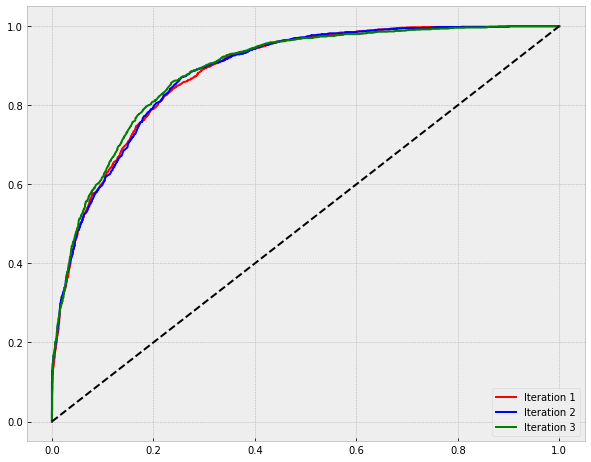

In [26]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    
    
    t = time.process_time()
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    y_hat = lr_clf_pipe.predict(Xnew[test_indices])
    
    elapsed_time = time.process_time() - t
    


    acc = mt.accuracy_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    f1_scor_ = mt.f1_score(y[test_indices],y_hat)
    prec_scor_ = mt.precision_score(y[test_indices], y_hat)
    auc_scor_ = mt.roc_auc_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    prob = lr_clf_pipe.predict_proba(Xnew[test_indices])
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y[test_indices], prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
    

In [27]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4




svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()
    svm_clf.fit(X_train_scaled, y_train)  # train object

    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num += 1
    
    

====Iteration 0  ====

Accuracy:  0.8440565253532835 

f1_score: 0.6543846720707444 

precision_score: 0.7302631578947368 

roc_auc_score: 0.7600879099961487 

Confusion Matrix: 

      0    1
0  4189  328
1   610  888 

Train Time:  39.86873717500001 s

====Iteration 1  ====

Accuracy:  0.8453865336658354 

f1_score: 0.6516853932584269 

precision_score: 0.742320819112628 

roc_auc_score: 0.7569579156977955 

Confusion Matrix: 

      0    1
0  4215  302
1   628  870 

Train Time:  38.984634207 s

====Iteration 2  ====

Accuracy:  0.8465502909393183 

f1_score: 0.65130336229694 

precision_score: 0.7502175805047868 

roc_auc_score: 0.7559480827953617 

Confusion Matrix: 

      0    1
0  4230  287
1   636  862 

Train Time:  38.619049274000005 s



In [28]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
for (train_indices, test_indices) in cv_object.split(X,y): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 

In [29]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions




# lets investigate SVMs on the data and play with the parameters and kernels


# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
t = time.process_time()
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

elapsed_time = time.process_time() - t


acc = mt.accuracy_score(y_test,y_hat)
f1_scor_ = mt.f1_score(y_test,y_hat)
prec_scor_ = mt.precision_score(y_test, y_hat)
auc_scor_ = mt.roc_auc_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)


print("Accuracy: ", acc, "\n" )
print("f1_score:", f1_scor_, "\n")
print("precision_score:",prec_scor_ , "\n")
print("roc_auc_score:",auc_scor_ , "\n")
print("Confusion Matrix: \n")
print (pd.DataFrame(conf),"\n")
print("Train Time: ", elapsed_time,  "s\n")





Accuracy:  0.8465502909393183 

f1_score: 0.65130336229694 

precision_score: 0.7502175805047868 

roc_auc_score: 0.7559480827953617 

Confusion Matrix: 

      0    1
0  4230  287
1   636  862 

Train Time:  40.597923469999984 s



In [30]:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(8334, 70)
(8334,)
[4176 4158]


[[ 2.33879608e-01  5.13666903e-02  1.45875159e-01  1.87371538e+00
   1.93776901e-01  1.23122303e-01  1.85585152e-02 -7.48267811e-02
   1.18147728e-01 -1.00320786e-01 -1.22350855e-01  1.76039011e-02
  -1.55362346e-01 -9.37245761e-02 -1.45582692e-02  1.21765701e-02
  -1.26448686e-02  3.53544072e-02  3.70441181e-02 -2.90130063e-02
  -1.71623091e-02 -2.17869642e-02 -3.50860086e-02  7.83679851e-02
   4.91224246e-02 -4.00580838e-02  4.50363295e-02 -3.00154293e-01
   1.09541458e-01 -1.82631316e-02  2.04536551e-02  2.60601306e-01
  -5.02497298e-02 -1.06157320e-01 -7.17513712e-02  5.92137584e-02
   3.55271368e-15 -2.89817142e-02  2.46892643e-01 -8.96505324e-02
  -5.20024348e-02 -5.02131047e-02 -1.07913527e-01 -7.81406902e-02
   1.70379710e-01  5.96897933e-02  6.26749661e-02  1.14864058e-01
  -3.33849488e-02 -1.59505921e-01 -6.64011476e-02 -2.42415979e-01
  -1.07360792e-01  1.41734796e-01  1.99707478e-01  6.80321234e-02
   7.47106298e-02 -3.07335926e-03  1.11544492e-01  1.85585152e-02
  -1.25616

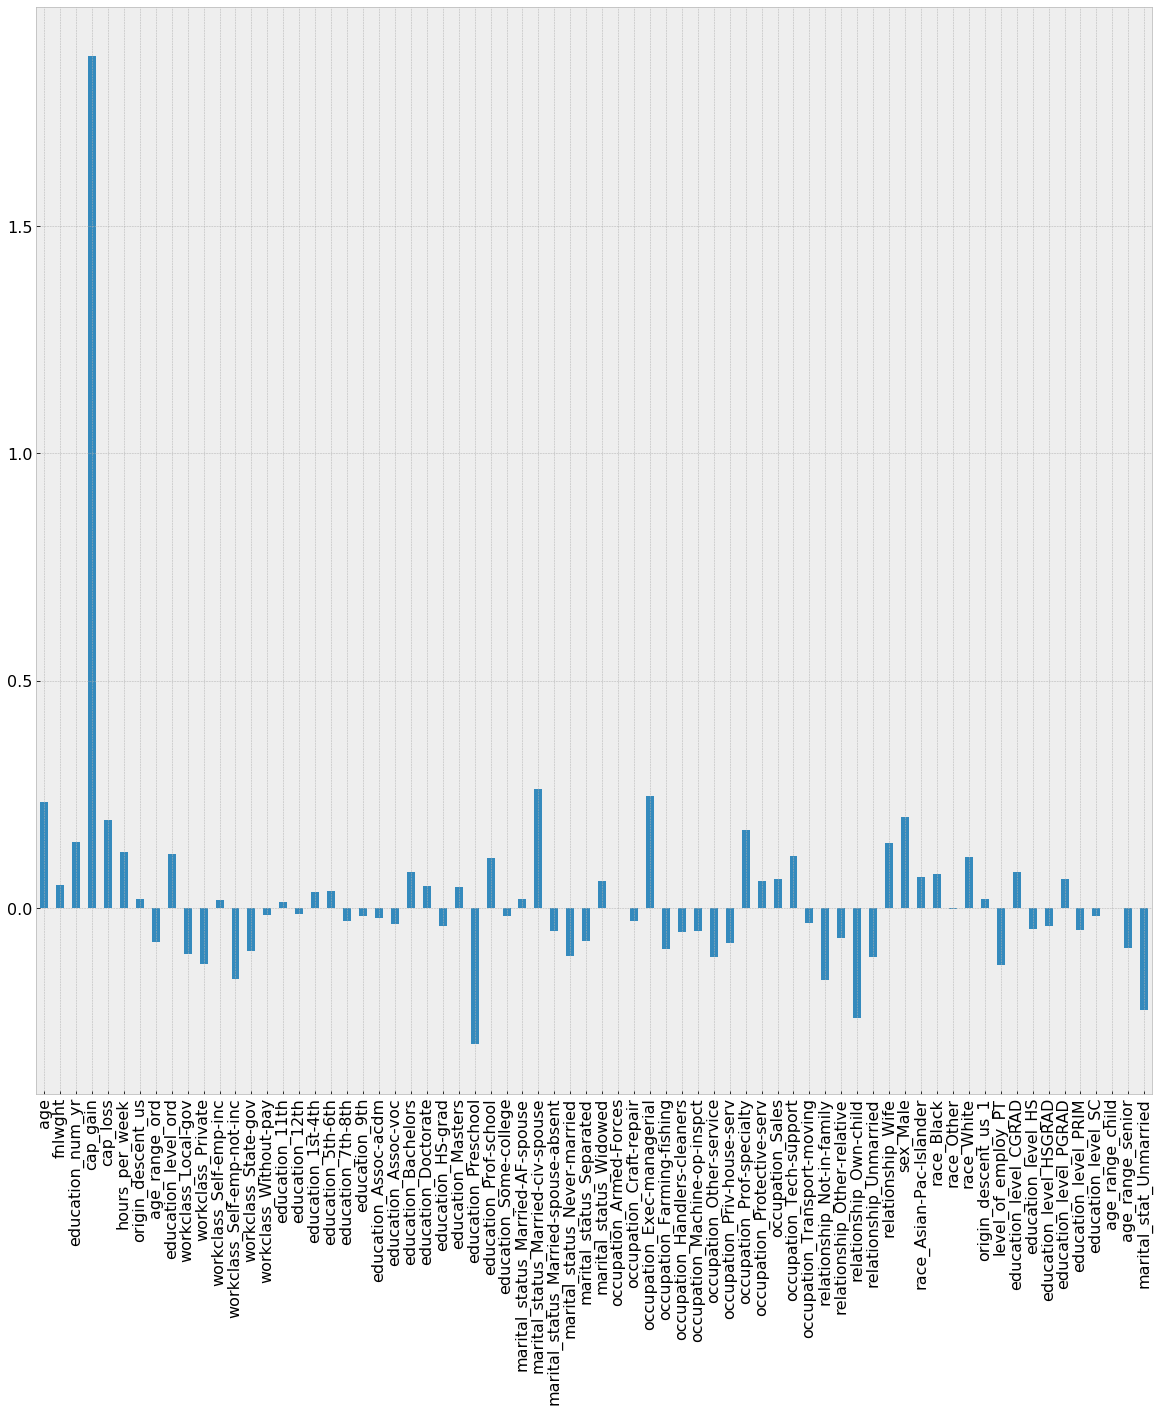

In [31]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=ml_df.columns)
weights.plot(kind='bar',figsize=(20,20), fontsize=16)

In [32]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

df_tested_on = ml_df.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['income_outcome'] = y[svm_clf.support_] # add back in the income_outcomw Column to the pandas support vectors dataframe
ml_df['income_outcome'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8334 entries, 14195 to 20518
Data columns (total 71 columns):
 #   Column                                Non-Null Count  Dtype           
---  ------                                --------------  -----           
 0   age                                   8334 non-null   int64           
 1   fnlwght                               8334 non-null   int64           
 2   education_num_yr                      8334 non-null   int64           
 3   cap_gain                              8334 non-null   int64           
 4   cap_loss                              8334 non-null   int64           
 5   hours_per_week                        8334 non-null   int64           
 6   origin_descent_us                     8334 non-null   int64           
 7   age_range_ord                         8334 non-null   int64           
 8   education_level_ord                   8334 non-null   int64           
 9   workclass_Local-gov                   8334 non-

<Figure size 720x288 with 0 Axes>

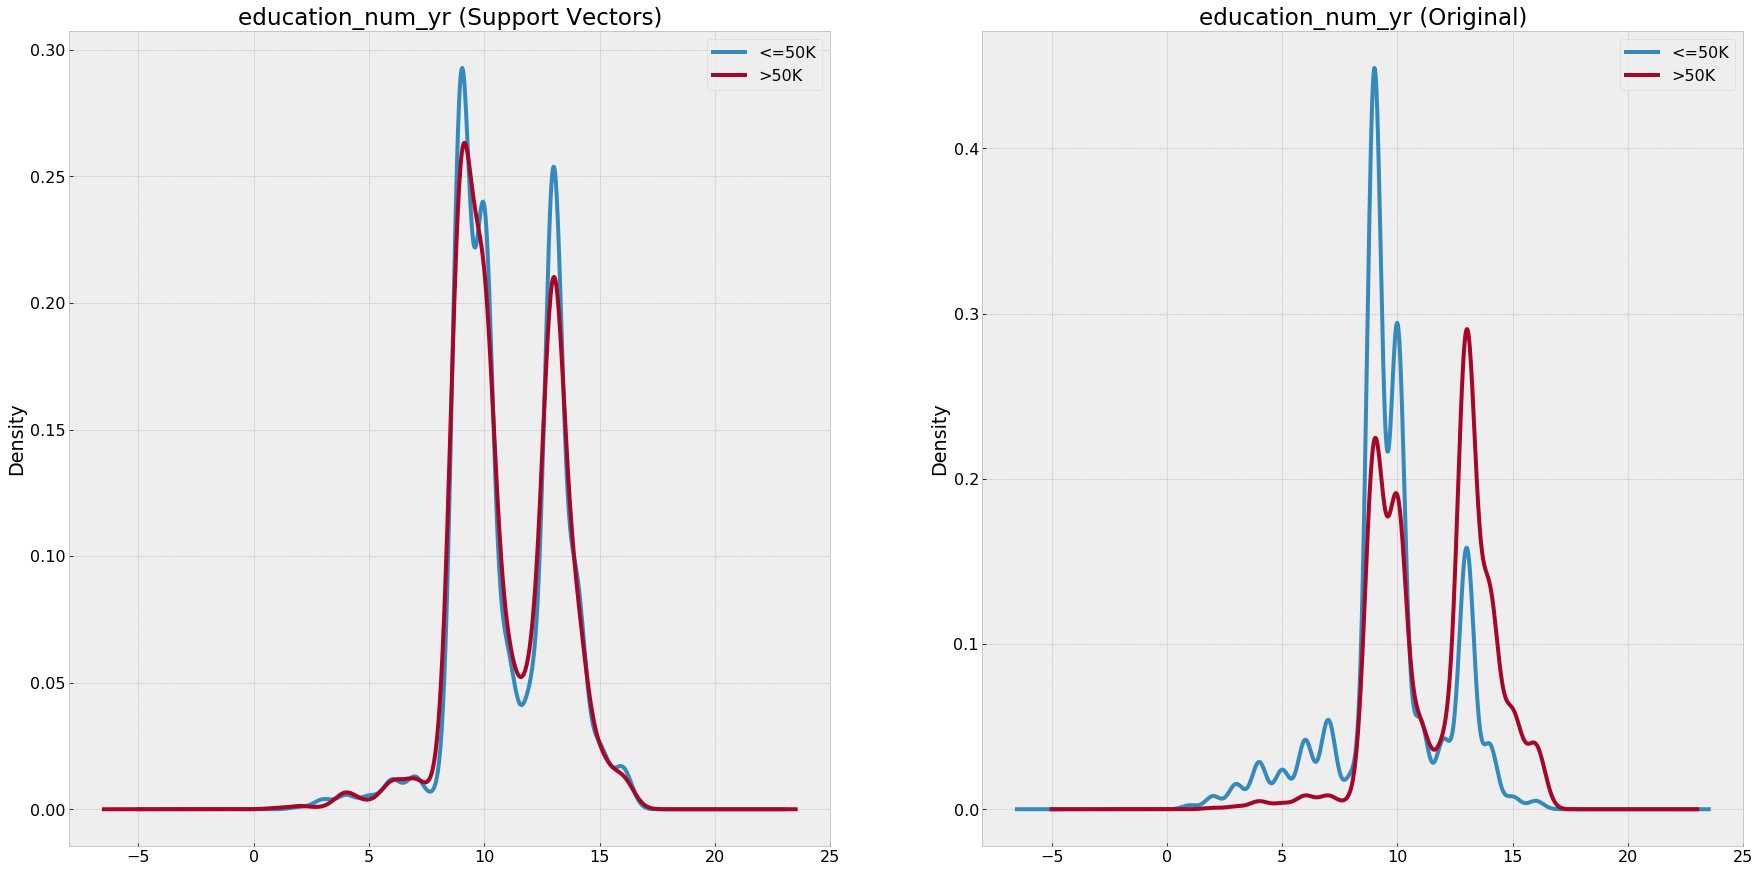

<Figure size 720x288 with 0 Axes>

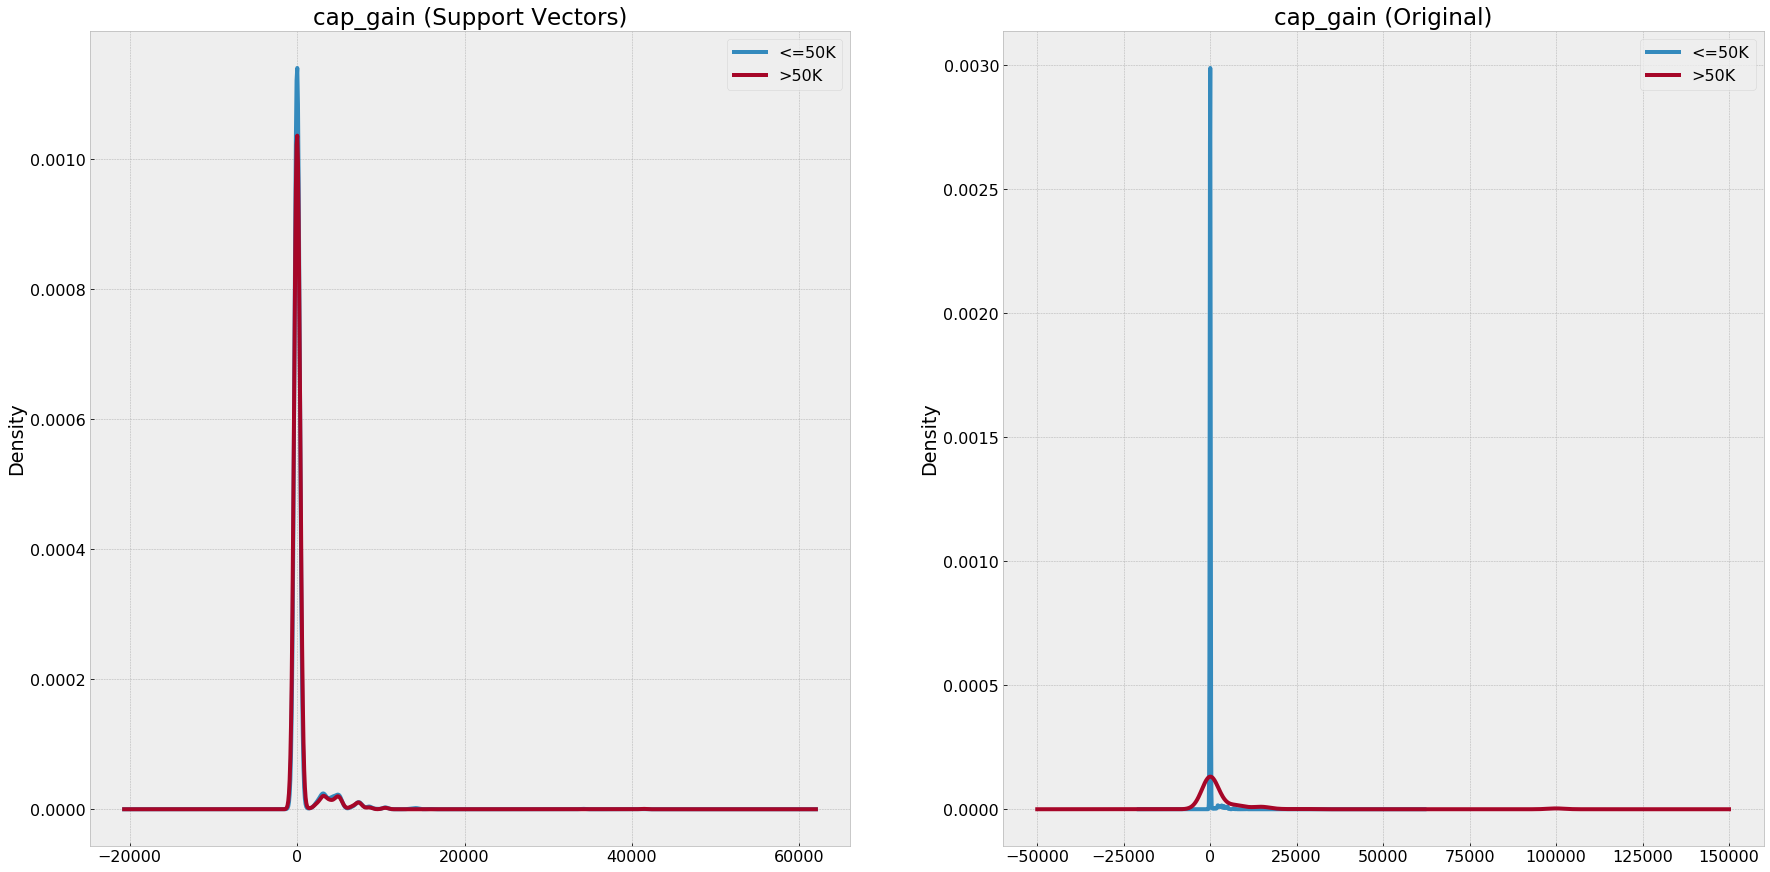

<Figure size 720x288 with 0 Axes>

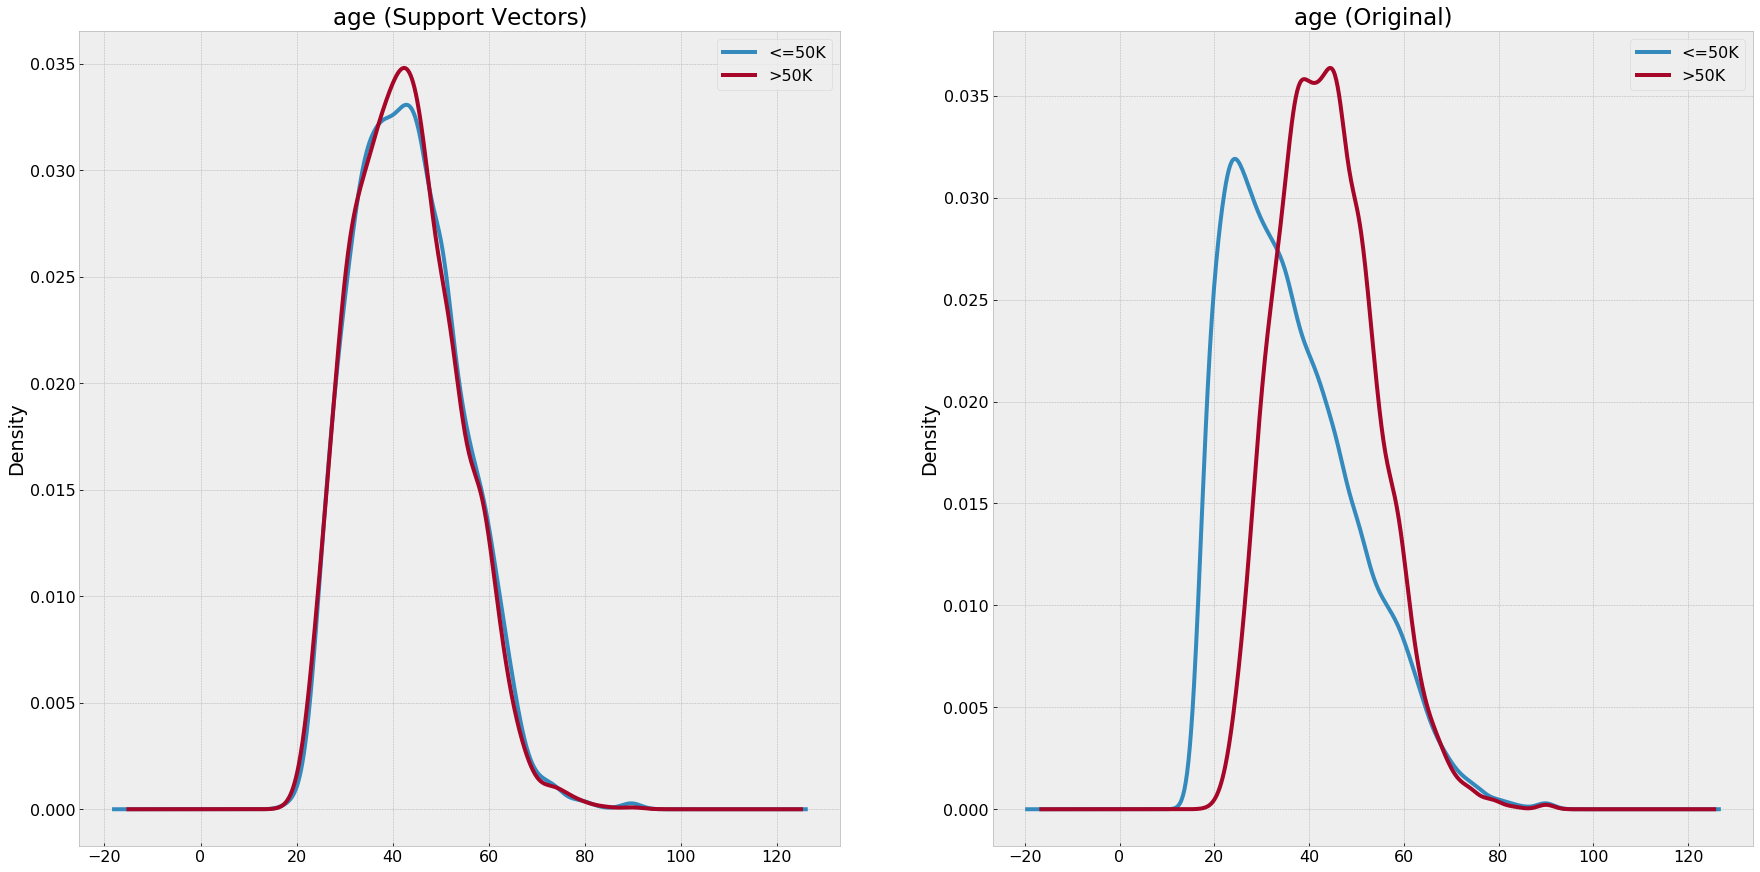

<Figure size 720x288 with 0 Axes>

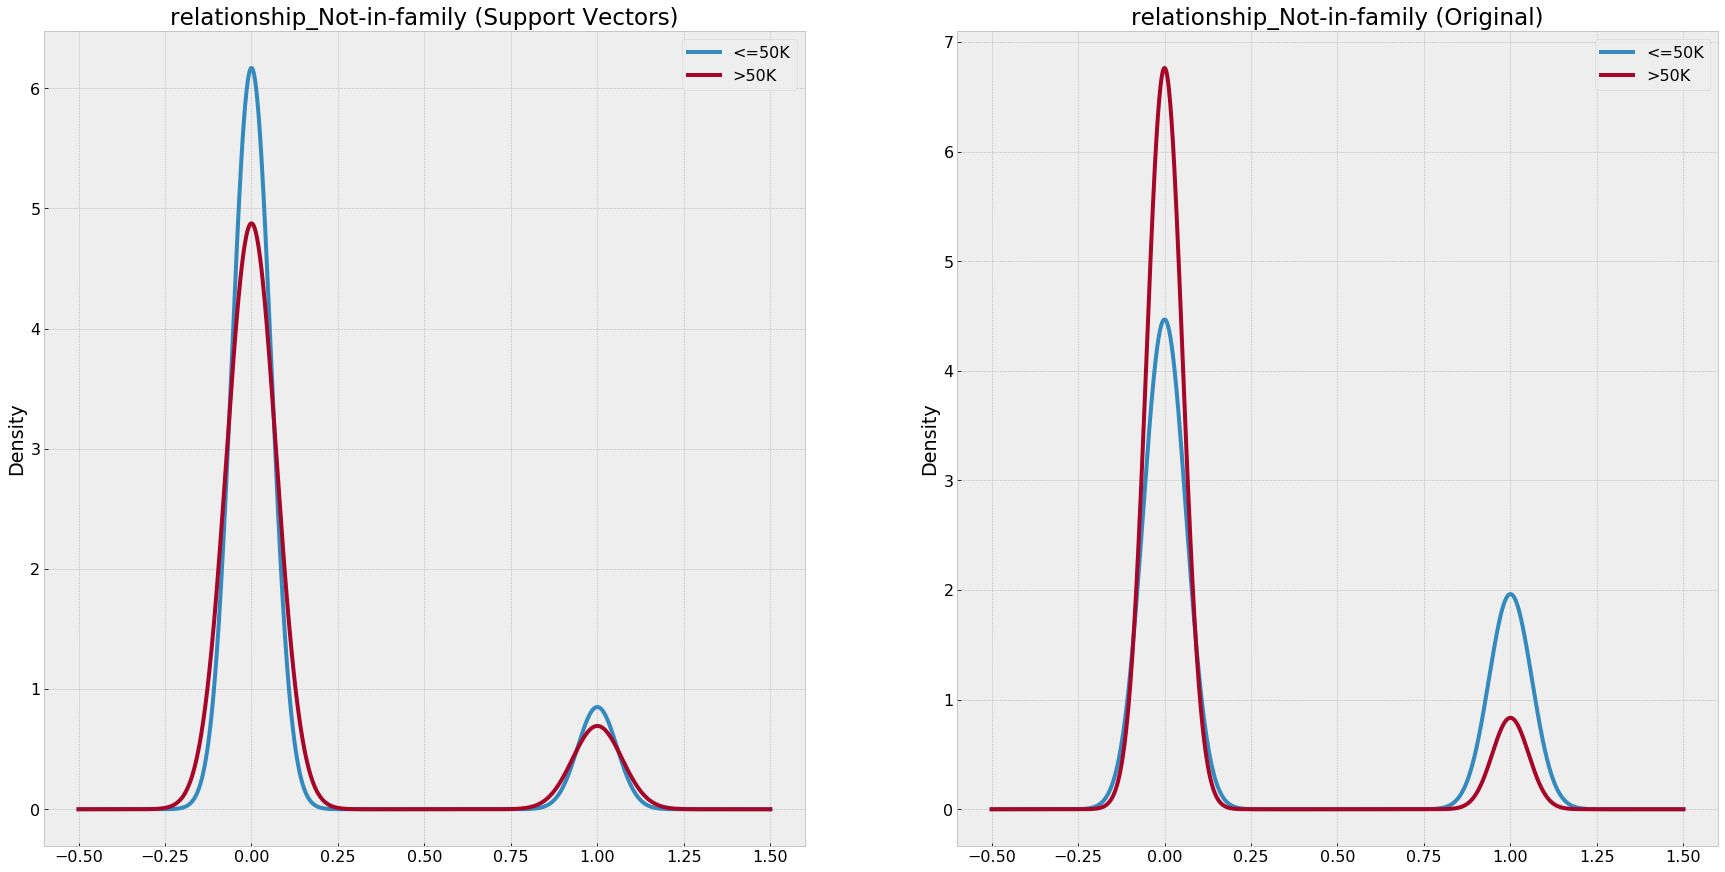

<Figure size 720x288 with 0 Axes>

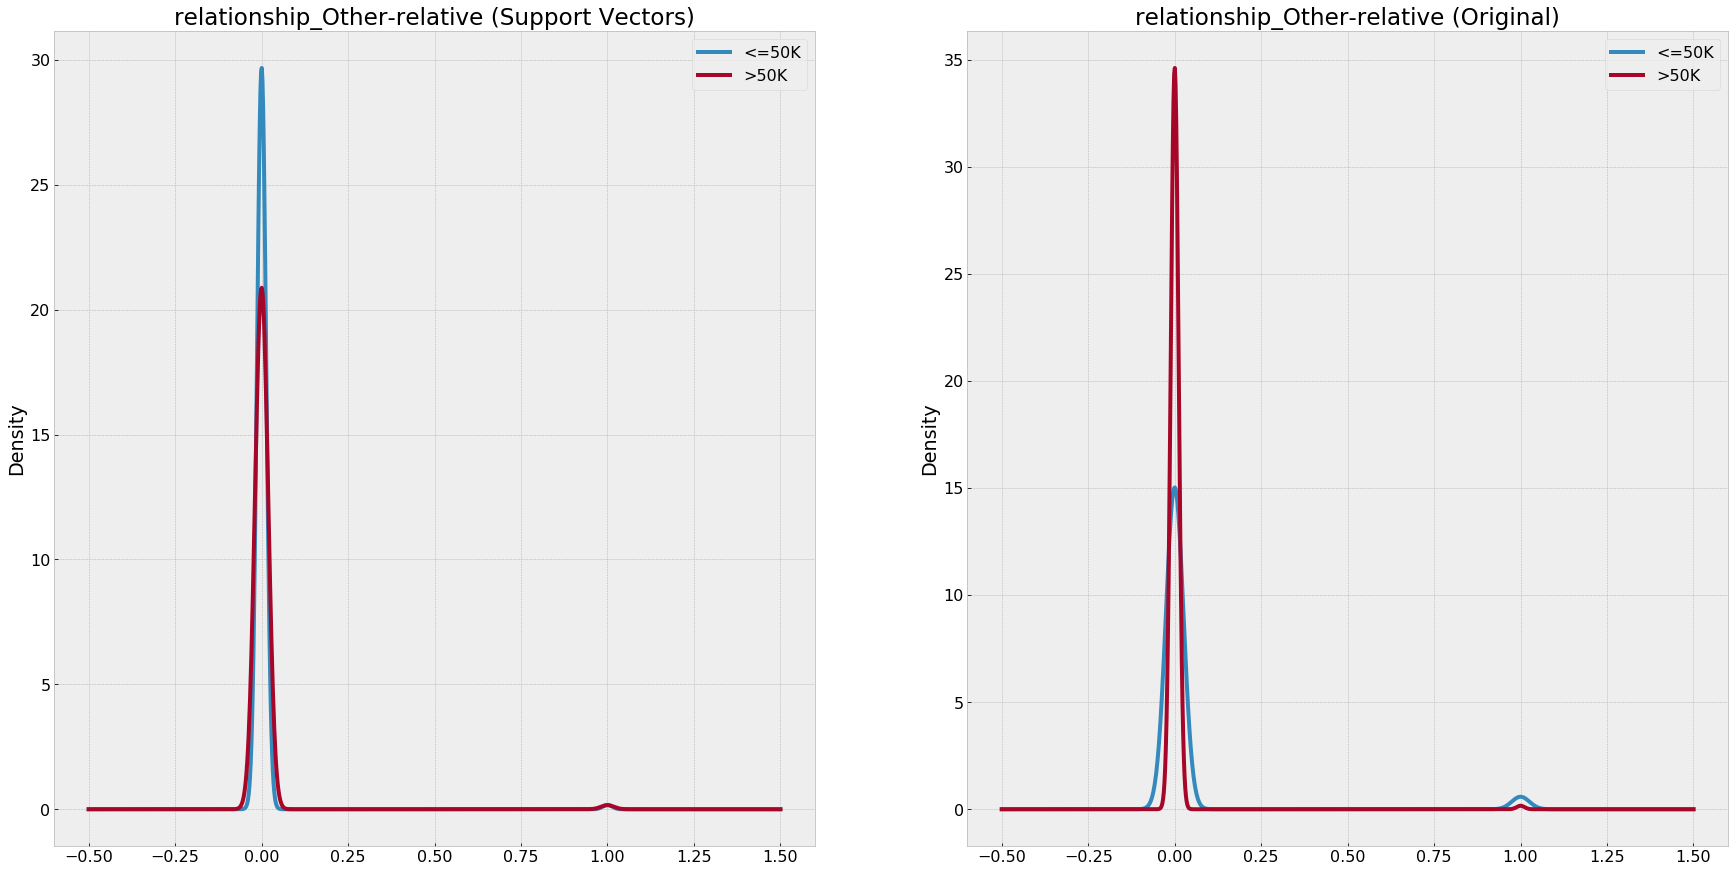

<Figure size 720x288 with 0 Axes>

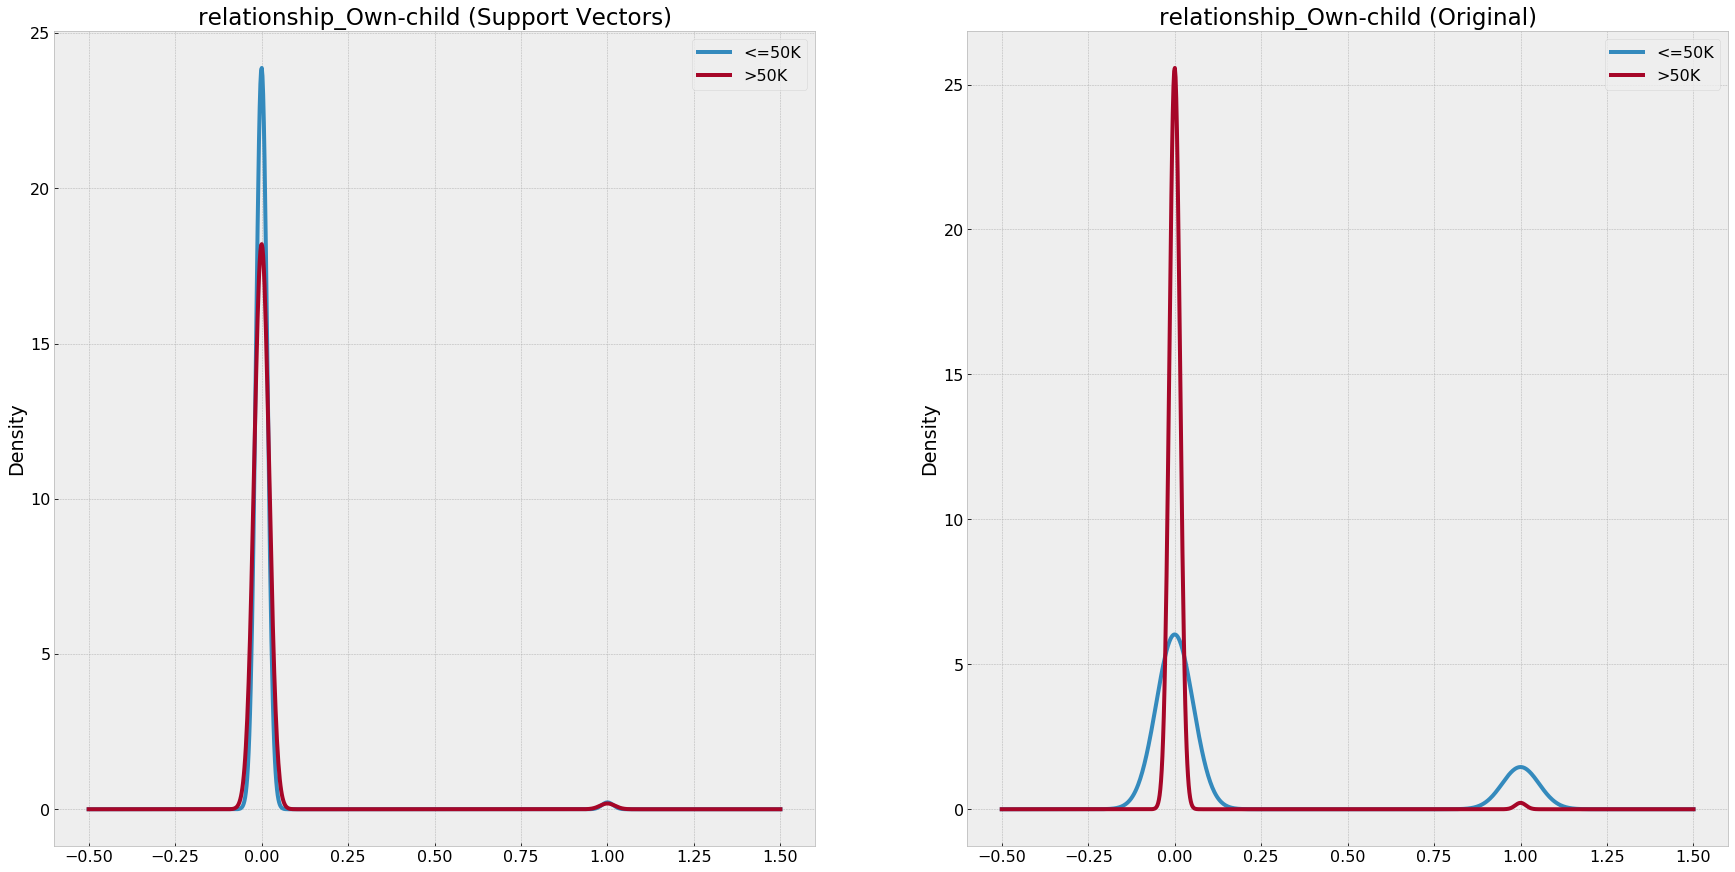

<Figure size 720x288 with 0 Axes>

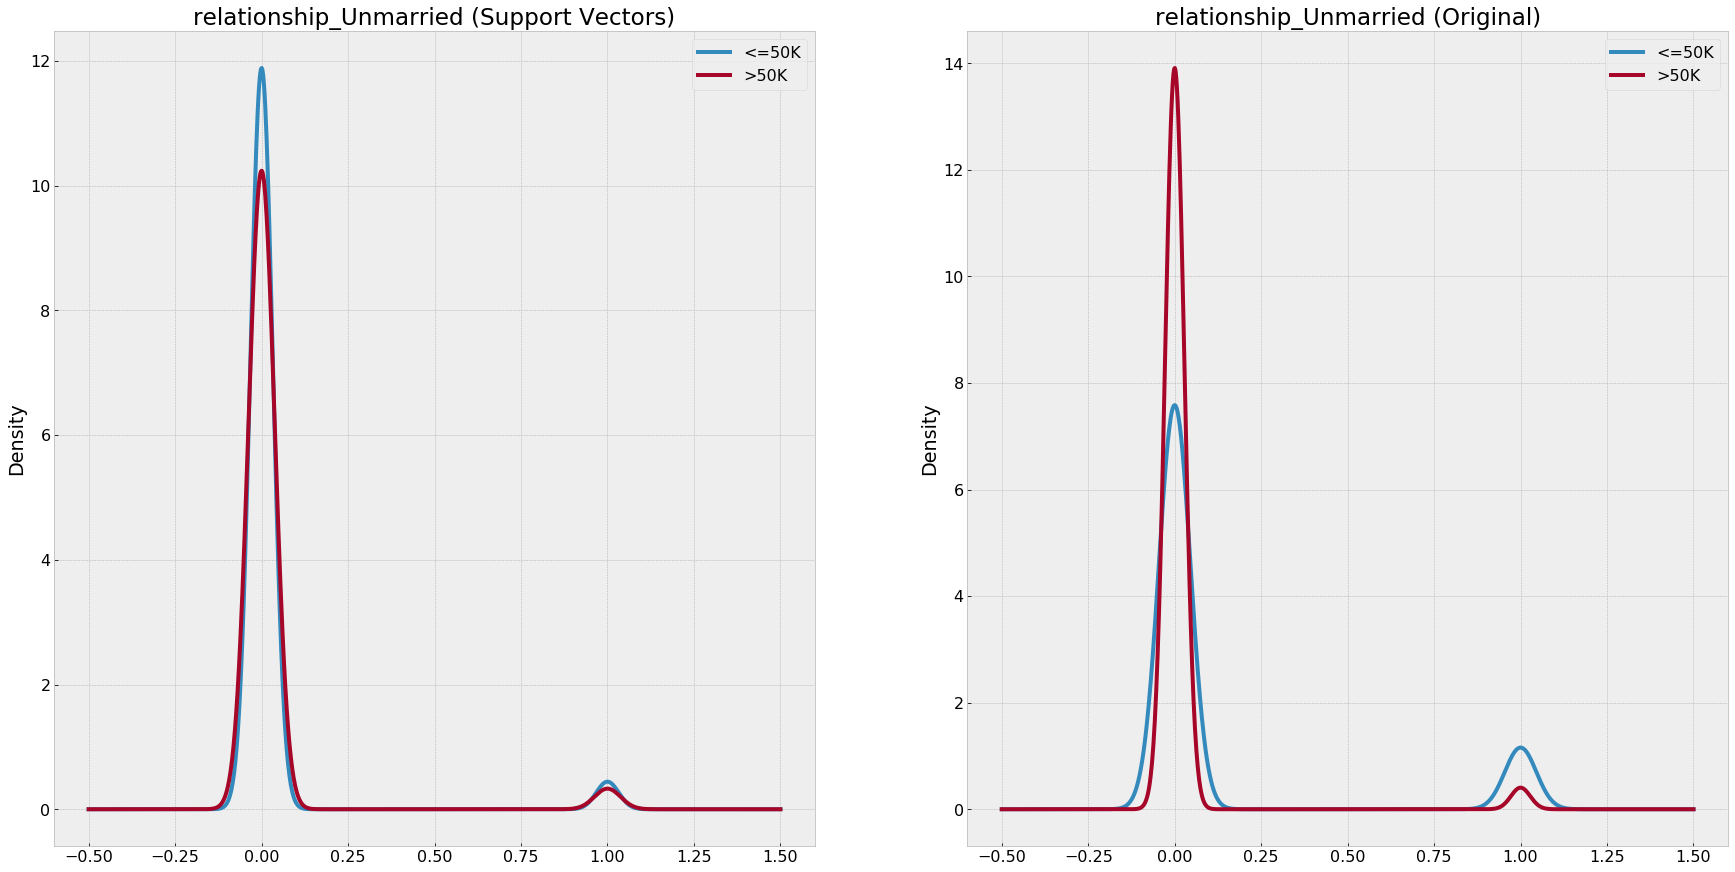

<Figure size 720x288 with 0 Axes>

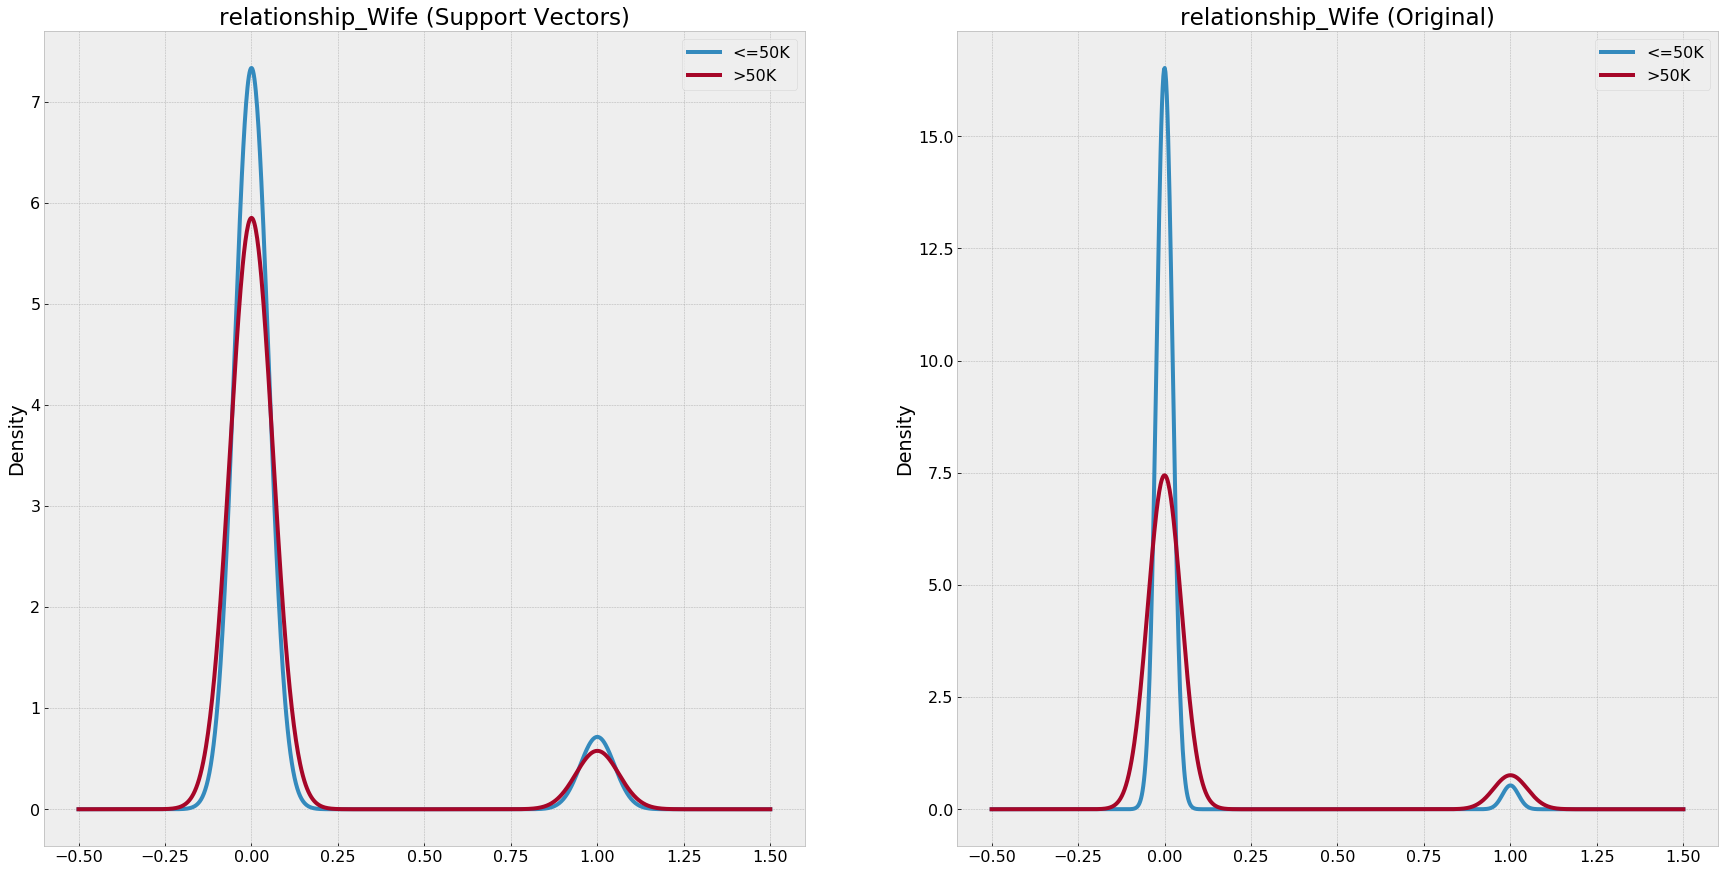

<Figure size 720x288 with 0 Axes>

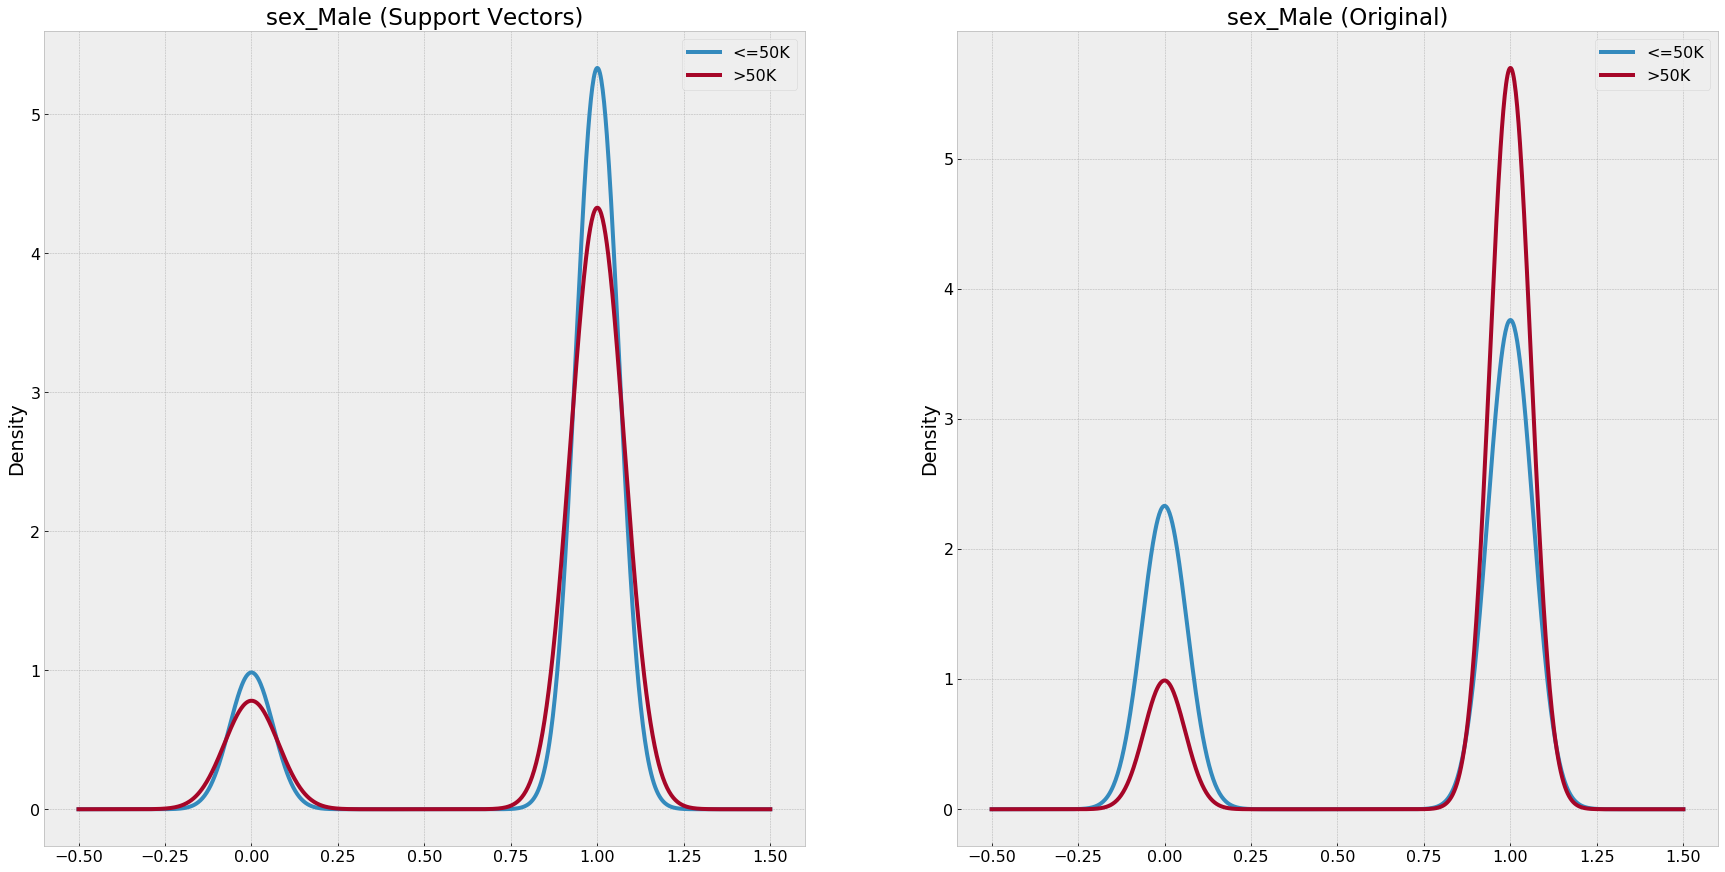

<Figure size 720x288 with 0 Axes>

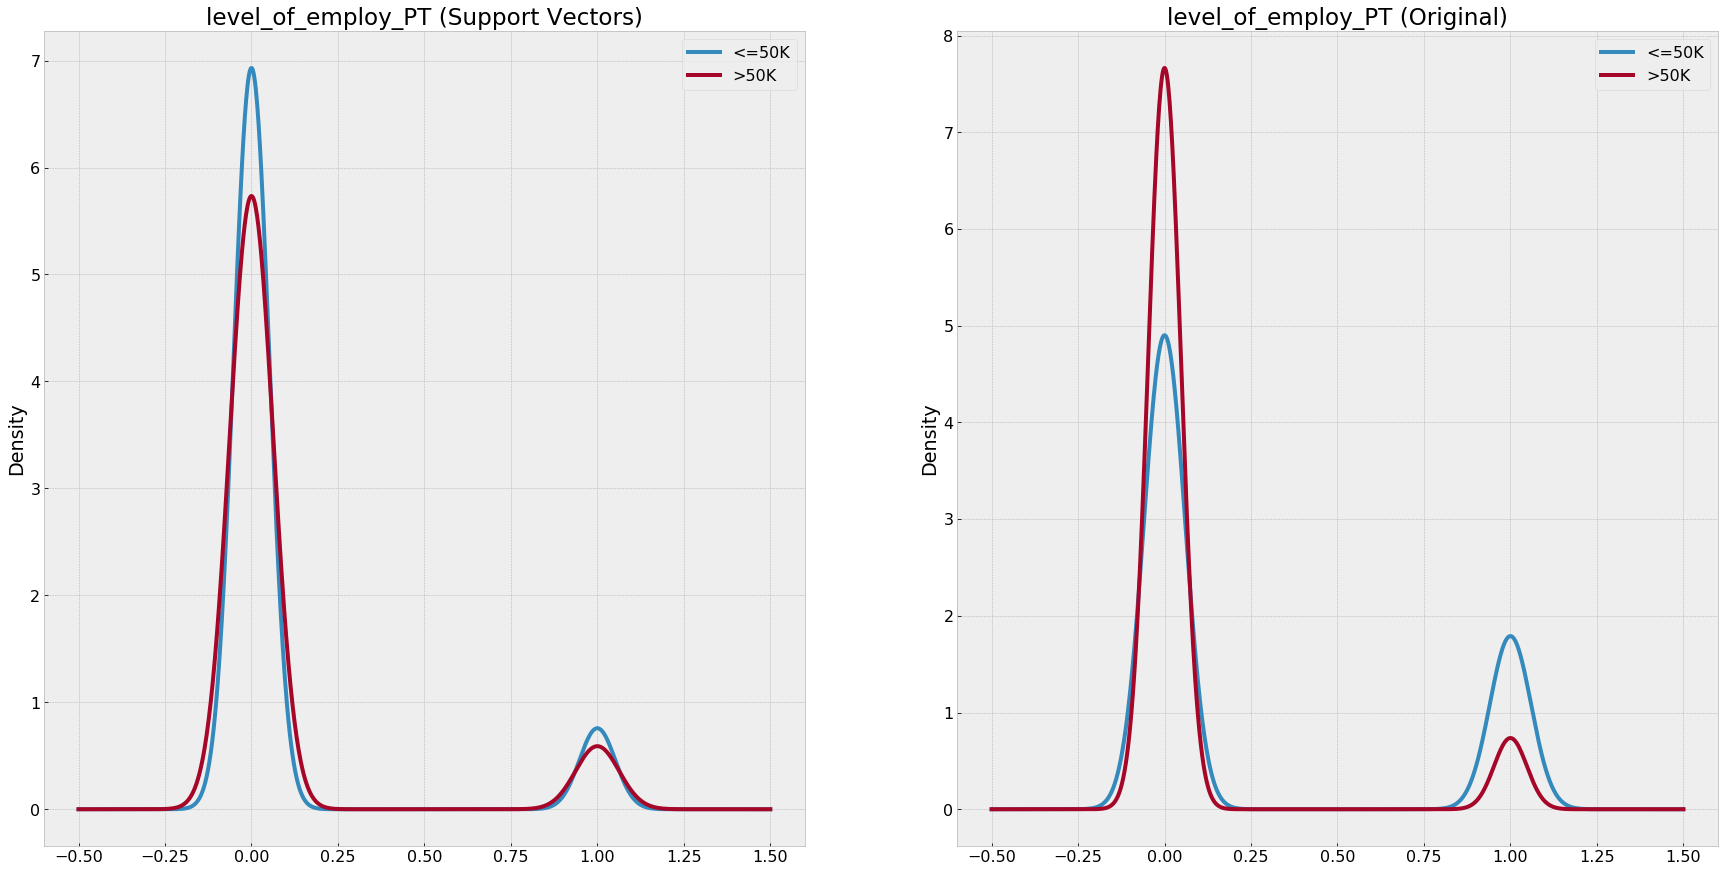

In [34]:
#https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4



# group the original data and the support vectors
df_grouped_support = df_support.groupby(['income_outcome'])
df_grouped = ml_df.groupby(['income_outcome'])

# plot KDE of Different variables
vars_to_plot = ['education_num_yr', 'cap_gain', 'age', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'level_of_employ_PT']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    plt.figure(figsize=(30,15))
    plt.rcParams.update({'font.size': 16,'lines.linewidth':4})
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Original)')

In [35]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
log_clf = LogisticRegression(penalty='l2', C=0.5, class_weight=None, solver='liblinear')
rfe = RFE(estimator=log_clf, n_features_to_select=1, step=1)
rfe.fit(X_train_scaled, y_train)
ranking = rfe.ranking_
ranks = list(rfe.ranking_)
names_ = list(ml_df.columns)
names_.remove('income_outcome')
ranking_dict = {'Importance_Ranking' : ranks, "Features" : names_}
important_feat_df = pd.DataFrame(ranking_dict)
important_feat_df.sort_values(by = 'Importance_Ranking').head(n=25)

Importance_Ranking                              Features
3                    1                              cap_gain
69                   2                marital_stat_Unmarried
8                    3                   education_level_ord
51                   4                relationship_Own-child
27                   5                   education_Preschool
42                   6              occupation_Other-service
0                    7                                   age
5                    8                        hours_per_week
54                   9                              sex_Male
53                  10                     relationship_Wife
43                  11            occupation_Priv-house-serv
34                  12              marital_status_Separated
39                  13            occupation_Farming-fishing
4                   14                              cap_loss
32                  15  marital_status_Married-spouse-absent
31                  16     marital_status_Married-civ-spouse
68                  17                      age_range_senior
38                  18            occupation_Exec-managerial
33                  19          marital_status_Never-married
28                  20                 education_Prof-school
60                  21                    level_of_employ_PT
40                  22          occupation_Handlers-cleaners
12                  23            workclass_Self-emp-not-inc
14                  24                 workclass_Without-pay
67                  25                       age_range_child

In [37]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV
log_clf = LogisticRegression(penalty='l2', C=0.5, class_weight=None, solver='liblinear')
rfecv = RFECV(estimator=log_clf, step=1, cv=3)
rfecv.fit(X_train_scaled, y_train)
ranking = rfecv.ranking_
ranks = list(rfecv.ranking_)
names_ = list(ml_df.columns)
names_.remove('income_outcome')
ranking_dict = {'Importance_Ranking' : ranks, "Features" : names_}
important_feat_df = pd.DataFrame(ranking_dict)
important_feat_df.sort_values(by = 'Importance_Ranking').head(n=25)



Importance_Ranking                      Features
0                    1                           age
35                   1        marital_status_Widowed
37                   1       occupation_Craft-repair
38                   1    occupation_Exec-managerial
39                   1    occupation_Farming-fishing
40                   1  occupation_Handlers-cleaners
41                   1  occupation_Machine-op-inspct
42                   1      occupation_Other-service
43                   1    occupation_Priv-house-serv
44                   1     occupation_Prof-specialty
45                   1    occupation_Protective-serv
46                   1              occupation_Sales
47                   1       occupation_Tech-support
49                   1    relationship_Not-in-family
50                   1   relationship_Other-relative
51                   1        relationship_Own-child
52                   1        relationship_Unmarried
53                   1             relationship_Wife
54                   1                      sex_Male
55                   1       race_Asian-Pac-Islander
56                   1                    race_Black
58                   1                    race_White
60                   1            level_of_employ_PT
61                   1         education_level_CGRAD
62                   1            education_level_HS

In [38]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions


svm_clf = SVC(C=0.5, kernel='rbf', gamma='auto') 
#svm_clf = SVC(C=10, kernel='rbf', gamma=10) #terrible scores and long compute times

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()

    svm_clf.fit(X_train_scaled, y_train)  

    y_hat = svm_clf.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t

    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1
    
    

====Iteration 0  ====

Accuracy:  0.8375727348295927 

f1_score: 0.6339452978643686 

precision_score: 0.7224594363791631 

roc_auc_score: 0.7464012972207354 

Confusion Matrix: 

      0    1
0  4192  325
1   652  846 

Train Time:  39.13392274 s

====Iteration 1  ====

Accuracy:  0.8408977556109726 

f1_score: 0.6354285714285715 

precision_score: 0.7400177462289264 

roc_auc_score: 0.7459381307760949 

Confusion Matrix: 

      0    1
0  4224  293
1   664  834 

Train Time:  39.834031778999986 s

====Iteration 2  ====

Accuracy:  0.8457190357439734 

f1_score: 0.6482183472327521 

precision_score: 0.75 

roc_auc_score: 0.7538330200728119 

Confusion Matrix: 

      0    1
0  4232  285
1   643  855 

Train Time:  39.08085503699999 s



In [39]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4


regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 

    t = time.process_time()
    
    svm_sgd.fit(X_train_scaled,y_train)
    yhat = svm_sgd.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,yhat)
    f1_scor_ = mt.f1_score(y_test,yhat)
    prec_scor_ = mt.precision_score(y_test, yhat)
    auc_scor_ = mt.roc_auc_score(y_test,yhat)
    conf = mt.confusion_matrix(y_test,yhat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1

====Iteration 0  ====

Accuracy:  0.827763923524522 

f1_score: 0.5901898734177216 

precision_score: 0.7242718446601941 

roc_auc_score: 0.7175618705539938 

Confusion Matrix: 

      0    1
0  4233  284
1   752  746 

Train Time:  0.044792216000018925 s

====Iteration 1  ====

Accuracy:  0.8307564422277639 

f1_score: 0.5957108816521048 

precision_score: 0.7352941176470589 

roc_auc_score: 0.7204466851677079 

Confusion Matrix: 

      0    1
0  4247  270
1   748  750 

Train Time:  0.05168409099997007 s

====Iteration 2  ====

Accuracy:  0.8362427265170407 

f1_score: 0.6016983420946219 

precision_score: 0.7630769230769231 

roc_auc_score: 0.7227610395145708 

Confusion Matrix: 

      0    1
0  4286  231
1   754  744 

Train Time:  0.04673445699995682 s



In [40]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4


log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()

    log_sgd.fit(X_train_scaled,y_train)
    yhat = log_sgd.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,yhat)
    f1_scor_ = mt.f1_score(y_test,yhat)
    prec_scor_ = mt.precision_score(y_test, yhat)
    auc_scor_ = mt.roc_auc_score(y_test,yhat)
    conf = mt.confusion_matrix(y_test,yhat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1

====Iteration 0  ====

Accuracy:  0.828428927680798 

f1_score: 0.5821862348178138 

precision_score: 0.7397119341563786 

roc_auc_score: 0.7119813356041396 

Confusion Matrix: 

      0    1
0  4264  253
1   779  719 

Train Time:  0.06747660399997812 s

====Iteration 1  ====

Accuracy:  0.8314214463840399 

f1_score: 0.5914585012087027 

precision_score: 0.7459349593495935 

roc_auc_score: 0.7173200899849346 

Confusion Matrix: 

      0    1
0  4267  250
1   764  734 

Train Time:  0.06759987600003114 s

====Iteration 2  ====

Accuracy:  0.8365752285951787 

f1_score: 0.5946391752577319 

precision_score: 0.7777777777777778 

roc_auc_score: 0.7178514604226195 

Confusion Matrix: 

      0    1
0  4311  206
1   777  721 

Train Time:  0.06743033600002946 s



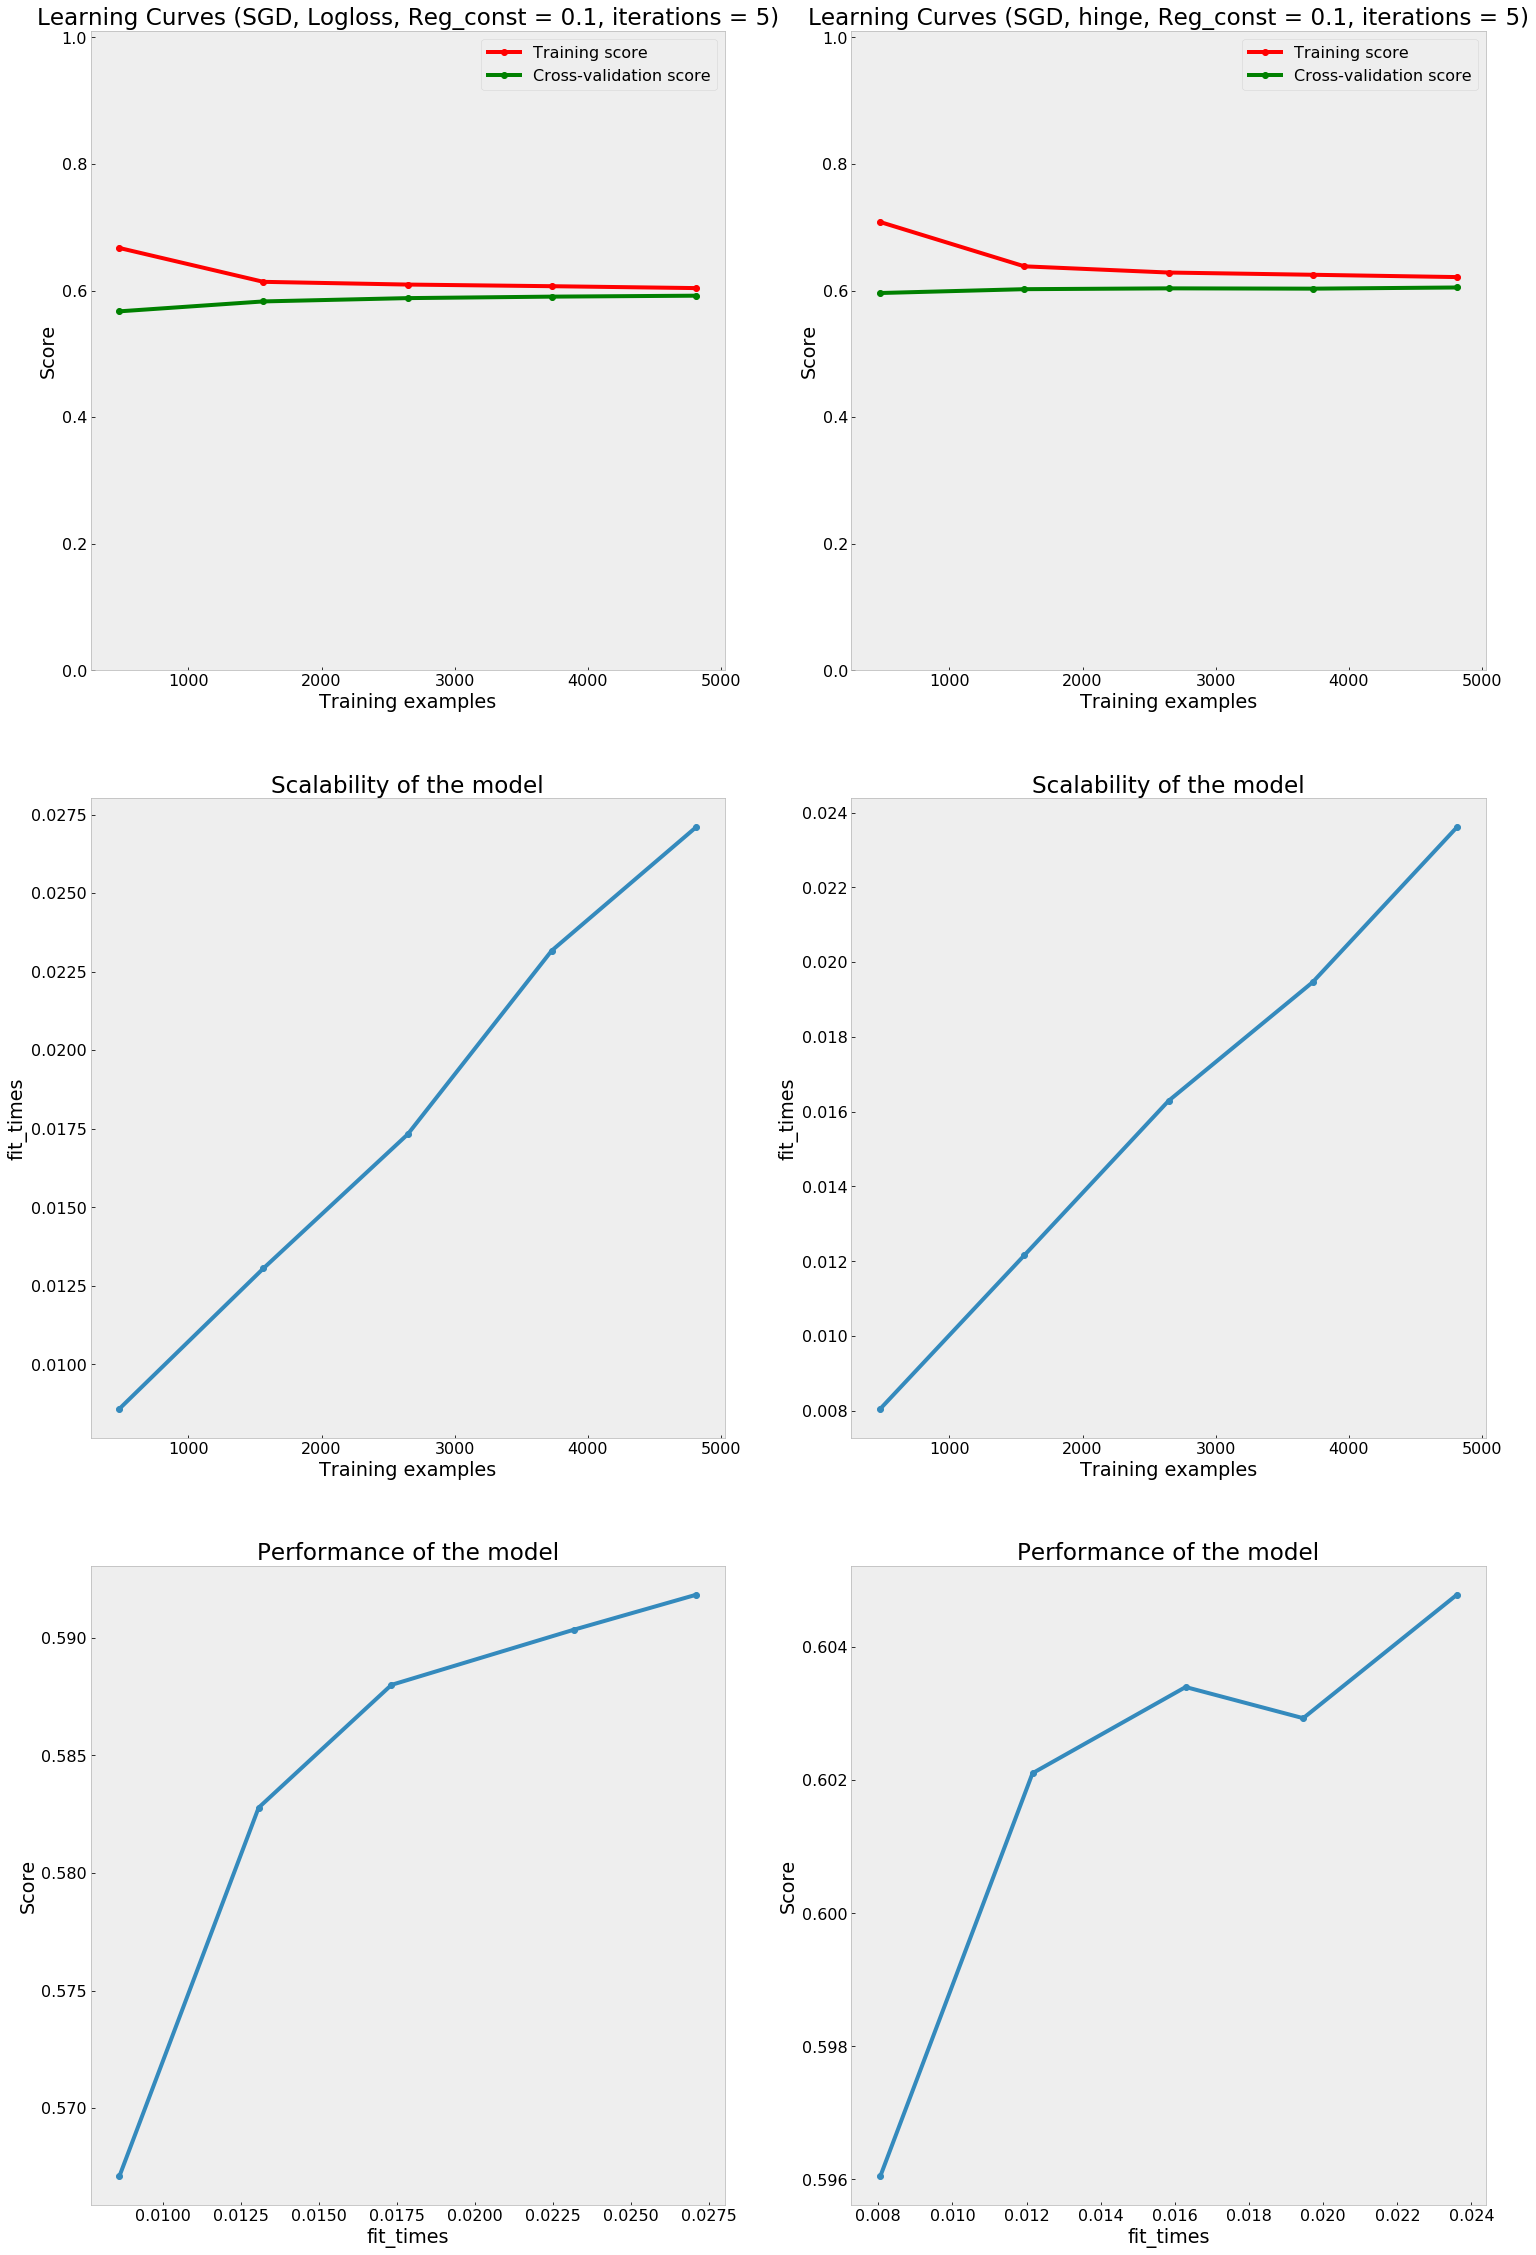

In [41]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve
#https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_ridge_regression.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-ridge-regression-py
#https://scikit-learn.org/stable/modules/model_evaluation.html



def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring=None):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()

    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(25, 40))

title = r"Learning Curves (SGD, Logloss, Reg_const = 0.1, iterations = 5)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
regularize_const = 0.1
iterations = 5
estimator = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4, scoring = 'f1')


title = r"Learning Curves (SGD, hinge, Reg_const = 0.1, iterations = 5)"

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
regularize_const = 0.1
iterations = 5
estimator = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4, scoring = 'f1')

plt.show()

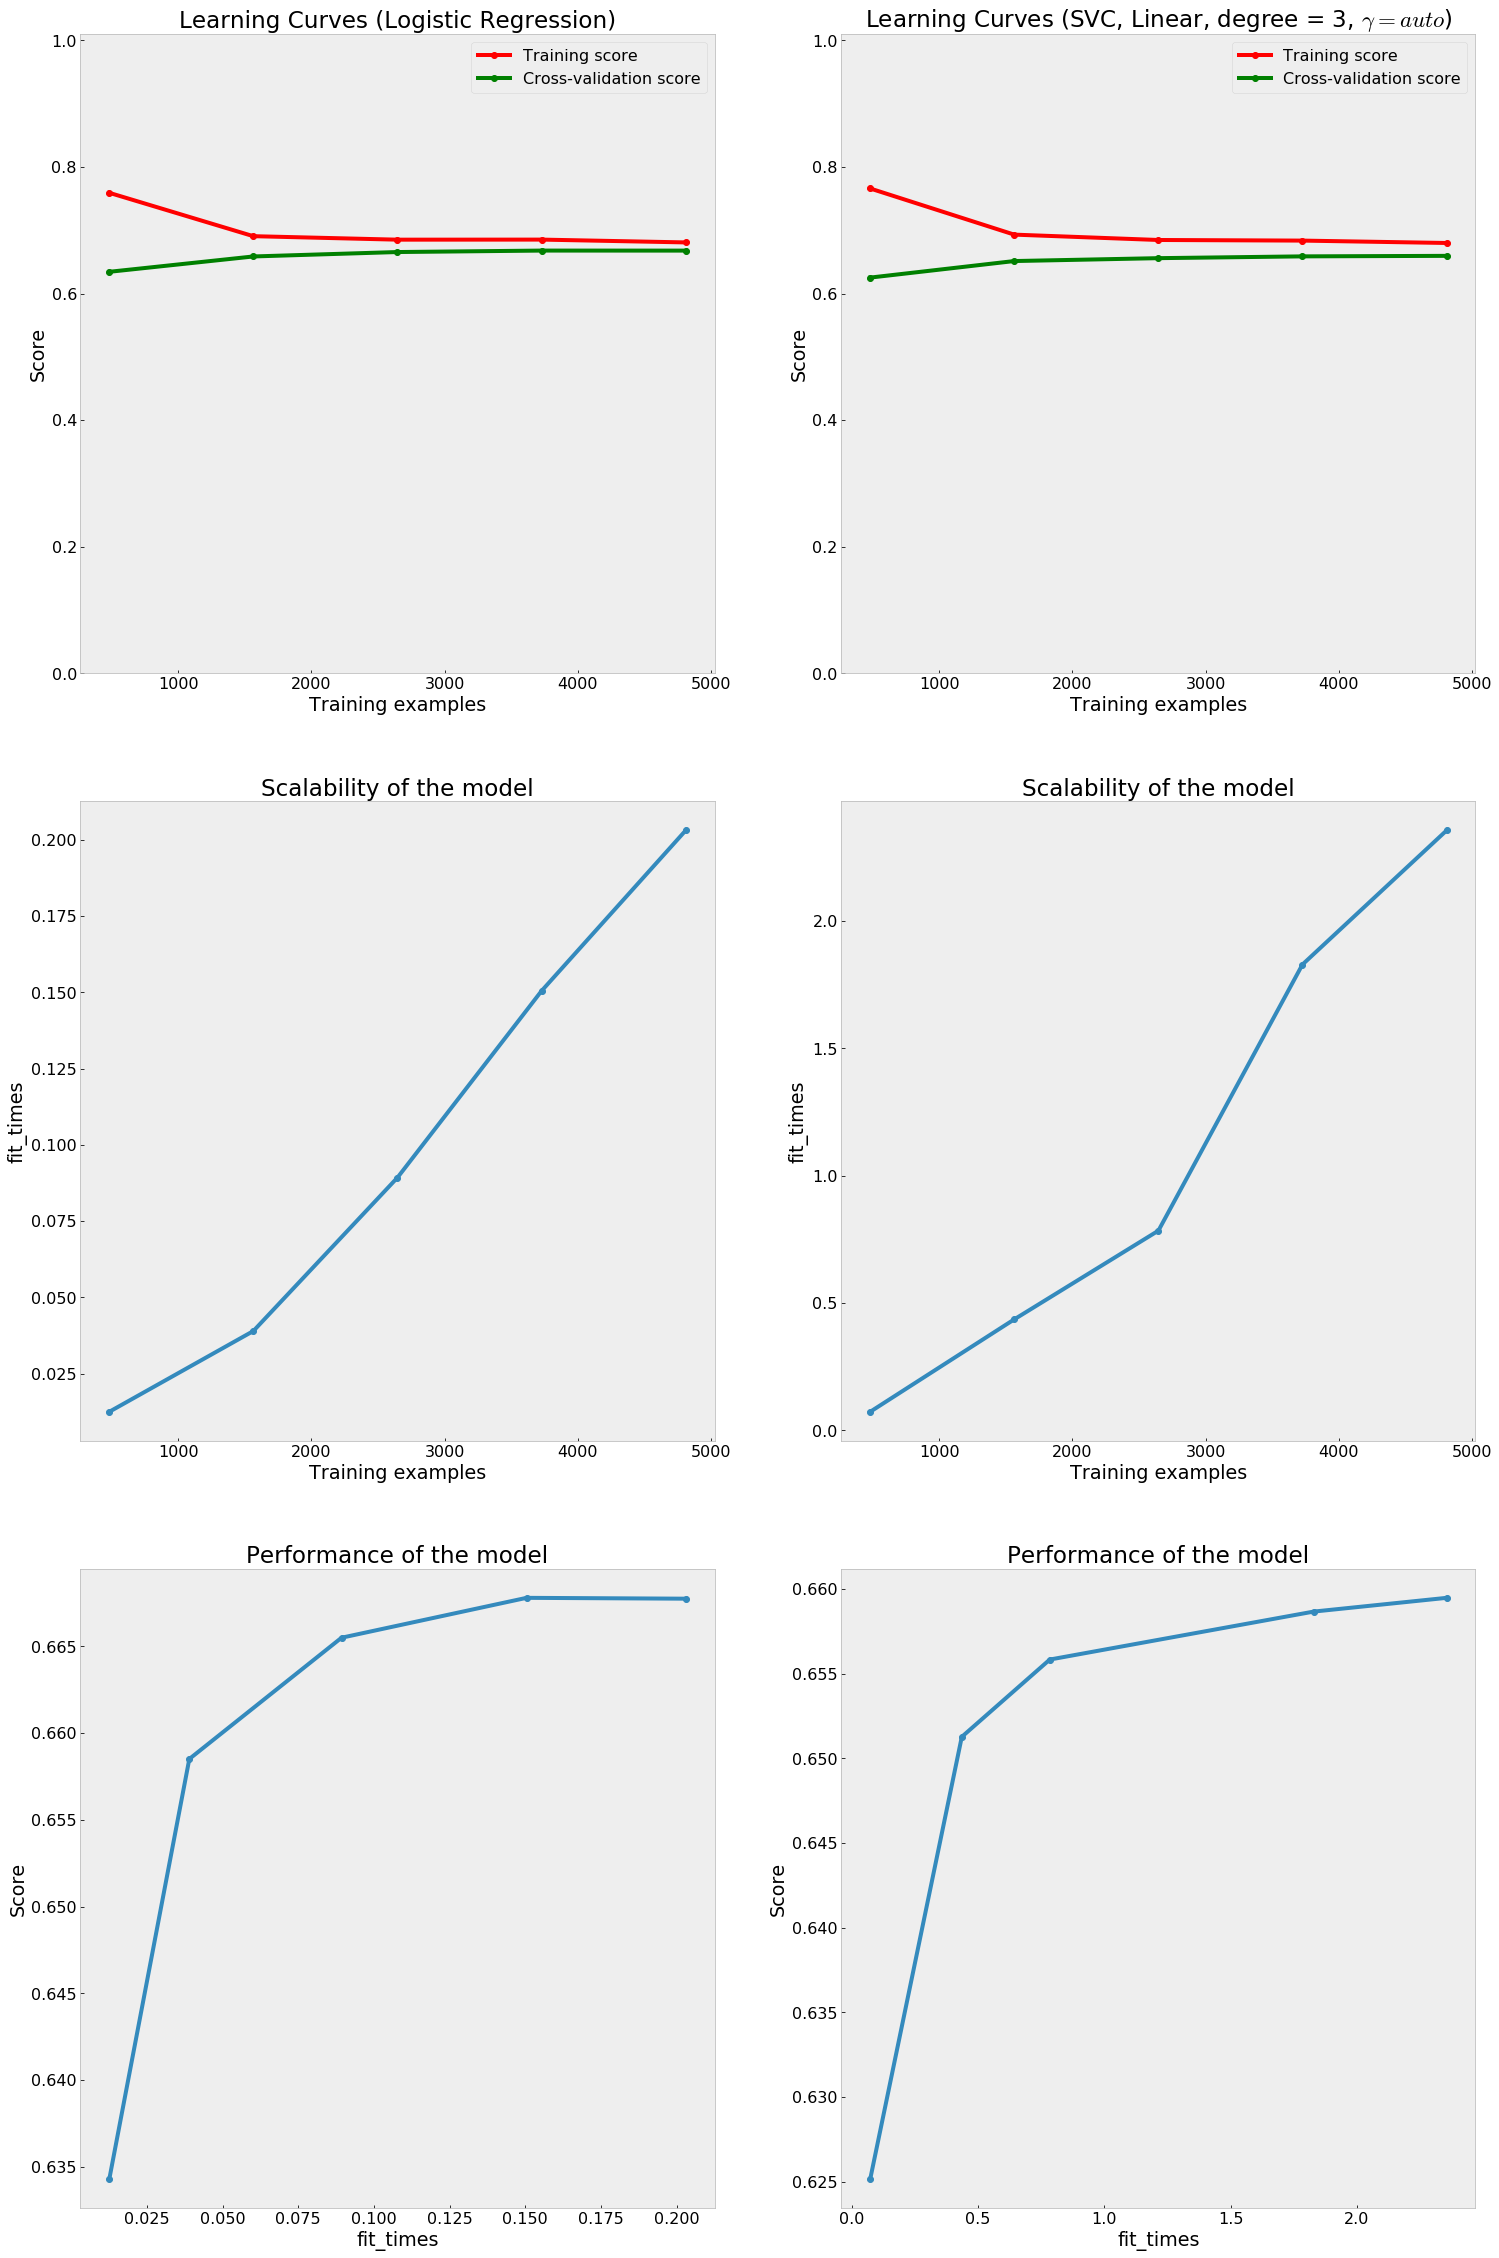

In [42]:
fig, axes = plt.subplots(3, 2, figsize=(25, 40))

title = r"Learning Curves (Logistic Regression)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
estimator = lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight=None, solver='liblinear')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 0], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4, scoring = 'f1')


title = r"Learning Curves (SVC, Linear, degree = 3, $\gamma=auto$)"

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.8, random_state=0)
estimator = SVC(C=0.5, kernel='linear', degree=3, gamma='auto')

plot_learning_curve(estimator, title, X_train_scaled, y_train, axes=axes[:, 1], ylim=(0.0, 1.01),
                    cv=cv, n_jobs=4, scoring = 'f1')

plt.show()

Rubric Sections

https://www.datasciencecentral.com/profiles/blogs/crisp-dm-a-standard-methodology-to-ensure-a-good-outcome

Create Models: 

50 PTS 

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

Model Advantages: 

10 PTS 

Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

Interpret Feature Importance: 

30 PTS 

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

Interpret Support Vectors: 

10 PTS 

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.